In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor as XGBR
from lightgbm import LGBMRegressor as LGBMR

C:\Users\ChristianGardel\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Import file and show heading + tail and the shape of it 
data = pd.read_csv('fifa21_train.csv')
display(data.head(10))
display(data.tail())
data.shape

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
5,182411,Yu Hanchao,33,China PR,Shanghai Greenland Shenhua FC,LM,LM LW RW,Shanghai Greenland Shenhua FC 2020 ~ 2023,"5'10""",154lbs,...,55+2,55+2,58+2,55+2,49+2,49+2,49+2,55+2,19+2,71
6,184392,M. Darmian,30,Italy,Parma,RB,RB LB,Parma 2019 ~ 2023,"6'0""",154lbs,...,74+2,74+2,74+2,74+2,74+2,74+2,74+2,74+2,15+2,76
7,257768,N. Mosti,22,Italy,AC Monza,LM,CAM,AC Monza 2019 ~ 2024,"5'10""",161lbs,...,52+2,52+2,52+2,50+2,46+2,46+2,46+2,50+2,15+2,60
8,225013,M. Čovilo,34,Bosnia Herzegovina,FC Lugano,CB,CDM CB,FC Lugano 2018 ~ 2021,"6'4""",192lbs,...,64+1,64+1,59+2,60+2,68+-3,68+-3,68+-3,60+2,16+2,65
9,179698,L. Grimi,35,Argentina,Club Atlético Huracán,CB,LB CB,Club Atlético Huracán 2020 ~ 2021,"6'0""",163lbs,...,66+1,66+1,65+2,65+2,68+-1,68+-1,68+-1,65+2,16+2,67


,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,...,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,214680,G. Gallon,27,France,ESTAC Troyes,GK,GK,ESTAC Troyes 2019 ~ 2022,"6'1""",174lbs,...,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,221489,J. Flores,22,Chile,CD Antofagasta,RM,LM CAM RM,CD Antofagasta 2019 ~ 2024,"5'6""",143lbs,...,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67
11699,146717,Anderson Silva,26,Brazil,Barnsley,CM,NaN,Barnsley 2010,"6'2""",179lbs,...,68+0,68+0,66+0,64+0,60+0,60+0,60+0,64+0,25+0,68
11700,236507,T. Conechny,22,Argentina,Portland Timbers,CAM,ST CAM LM,Portland Timbers 2019 ~ 2020,"5'7""",143lbs,...,43+2,43+2,46+2,44+2,36+2,36+2,36+2,44+2,15+2,64


(11701, 101)

In [3]:
# Standarize Headers of columns 
def standardize_header(dataframe):
    dataframe.columns = [c.lower().replace(' ', '_') for c in dataframe.columns]

standardize_header(data)

In [4]:
data.columns

Index(['id', 'name', 'age', 'nationality', 'club', 'bp', 'position',
       'team_&_contract', 'height', 'weight',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'ova'],
      dtype='object', length=101)

In [5]:
# Searching for duplicates
for c in data.columns:
    print(f'{c} : {data[c].isna().sum()}')

id : 0
name : 0
age : 0
nationality : 0
club : 18
bp : 0
position : 288
team_&_contract : 0
height : 0
weight : 0
foot : 0
growth : 0
joined : 41
loan_date_end : 11072
value : 0
wage : 0
release_clause : 0
contract : 0
attacking : 0
crossing : 0
finishing : 0
heading_accuracy : 0
short_passing : 0
volleys : 41
skill : 0
dribbling : 0
curve : 41
fk_accuracy : 0
long_passing : 0
ball_control : 0
movement : 0
acceleration : 0
sprint_speed : 0
agility : 41
reactions : 0
balance : 41
power : 0
shot_power : 0
jumping : 41
stamina : 0
strength : 0
long_shots : 0
mentality : 0
aggression : 0
interceptions : 7
positioning : 7
vision : 41
penalties : 0
composure : 279
defending : 0
marking : 0
standing_tackle : 0
sliding_tackle : 41
goalkeeping : 0
gk_diving : 0
gk_handling : 0
gk_kicking : 0
gk_positioning : 0
gk_reflexes : 0
total_stats : 0
base_stats : 0
w/f : 0
sm : 0
a/w : 59
d/w : 59
ir : 0
pac : 0
sho : 0
pas : 0
dri : 0
def : 0
phy : 0
hits : 0
ls : 0
st : 0
rs : 0
lw : 0
lf : 0
cf : 0
r

In [6]:
# Drop duplicate columns
def drop_duplicate_columns(dataframe):
    return dataframe.loc[:,~dataframe.T.duplicated(keep='first')]

data = drop_duplicate_columns(data)
data.shape

(11701, 85)

In [7]:
# Standardize headers kept after drop of duplicate columns

def map_columns(dataframe):
    col_mapping = {
        'ls':'striker',
        'lw':'wing',
        'lf':'forward',
        'lam':'att_mid',
        'lm':'side_mid',
        'lcm':'center_mid',
        'lwb':'back_wing',
        'ldm':'def_wing',
        'lb':'def_laterals',
        'lcb':'center_back'
    }
    return dataframe.rename(columns = col_mapping)

data = map_columns(data)

In [8]:
# Drop useless columns

def drop_useless_cols(dataframe):
    return dataframe.drop(columns=[
        'id', 'name', 'age', 'nationality', 'club', 'position', 'team_&_contract', 'joined', 'loan_date_end', 
        'value', 'wage', 'release_clause', 'contract', 
        
        # Trying to remove highly correlated columns
        'ir',
        'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 
        'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 
        'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
        'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
        'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure',
        'marking', 'standing_tackle', 'sliding_tackle',
        'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'
    ], axis=1)
    
data = drop_useless_cols(data)
data.shape

(11701, 37)

In [9]:
map_columns(data)

,bp,height,weight,foot,growth,attacking,skill,movement,power,mentality,...,forward,att_mid,side_mid,center_mid,back_wing,def_wing,def_laterals,center_back,gk,ova
0,CM,"5'9""",161lbs,Right,1,258,286,346,306,290,...,62+0,63+1,63+1,63+1,59+1,59+1,58+1,54+1,15+1,64
1,ST,"6'0""",159lbs,Right,0,365,375,404,372,313,...,77+0,76+1,76+1,68+2,57+2,53+2,53+2,48+2,18+2,77
2,CAM,"5'4""",134lbs,Right,0,336,424,424,308,332,...,79+0,80+0,79+1,74+2,59+2,56+2,53+2,41+2,12+2,80
3,CDM,"5'10""",152lbs,Right,13,242,259,282,277,257,...,51+0,53+2,53+2,56+2,56+2,58+2,57+2,58+2,14+2,59
4,CDM,"5'11""",150lbs,Right,8,249,280,324,280,294,...,59+0,61+2,62+2,63+2,64+2,64+2,63+2,61+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,LB,"6'1""",168lbs,Left,5,224,248,333,273,266,...,52+0,54+2,58+2,56+2,63+2,60+2,63+2,61+2,16+2,65
11697,GK,"6'1""",174lbs,Right,4,84,96,237,217,101,...,26+0,24+2,25+2,25+2,25+2,26+2,24+2,26+2,69+2,70
11698,RM,"5'6""",143lbs,Right,8,286,291,388,278,241,...,65+0,65+2,66+2,58+2,49+2,44+2,45+2,35+2,17+2,67
11699,CM,"6'2""",179lbs,Right,7,254,284,198,258,241,...,68+0,72+0,71+0,71+0,66+0,68+0,64+0,60+0,25+0,68


In [10]:
# Identifying types
for c in data.columns:
    print(f'{c} : {data[c].dtypes}')

bp : object
height : object
weight : object
foot : object
growth : int64
attacking : int64
skill : int64
movement : int64
power : int64
mentality : int64
defending : int64
goalkeeping : int64
total_stats : int64
base_stats : int64
w/f : object
sm : object
a/w : object
d/w : object
pac : int64
sho : int64
pas : int64
dri : int64
def : int64
phy : int64
hits : object
striker : object
wing : object
forward : object
att_mid : object
side_mid : object
center_mid : object
back_wing : object
def_wing : object
def_laterals : object
center_back : object
gk : object
ova : int64


In [11]:
# Converting Height into float as cm
def convert_into_cm(dataframe):
    dataframe['height'] = dataframe['height'].str.replace("'", '.').str.replace('"', '').astype(float)
    dataframe['height'] = round(dataframe['height'] * 30.48, 1)

convert_into_cm(data)

In [12]:
data['height'].dtypes

dtype('float64')

In [13]:
data['height'] 

0        179.8
1        182.9
2        164.6
3        155.4
4        155.8
         ...  
11696    185.9
11697    185.9
11698    170.7
11699    189.0
11700    173.7
Name: height, Length: 11701, dtype: float64

In [14]:
# Converting weight into float as kgs
def convert_int_kg(dataframe):
    dataframe['weight'] = dataframe['weight'].str.replace('lbs', '').astype(float)
    dataframe['weight'] = round(dataframe['weight'] * 0.453592, 1)

convert_int_kg(data)

In [15]:
data['weight'].dtypes

dtype('float64')

In [16]:
data['weight'] 

0        73.0
1        72.1
2        60.8
3        68.9
4        68.0
         ... 
11696    76.2
11697    78.9
11698    64.9
11699    81.2
11700    64.9
Name: weight, Length: 11701, dtype: float64

In [17]:
display(data.head(10))
display(data.tail())
data.shape

,bp,height,weight,foot,growth,attacking,skill,movement,power,mentality,...,forward,att_mid,side_mid,center_mid,back_wing,def_wing,def_laterals,center_back,gk,ova
0,CM,179.8,73.0,Right,1,258,286,346,306,290,...,62+0,63+1,63+1,63+1,59+1,59+1,58+1,54+1,15+1,64
1,ST,182.9,72.1,Right,0,365,375,404,372,313,...,77+0,76+1,76+1,68+2,57+2,53+2,53+2,48+2,18+2,77
2,CAM,164.6,60.8,Right,0,336,424,424,308,332,...,79+0,80+0,79+1,74+2,59+2,56+2,53+2,41+2,12+2,80
3,CDM,155.4,68.9,Right,13,242,259,282,277,257,...,51+0,53+2,53+2,56+2,56+2,58+2,57+2,58+2,14+2,59
4,CDM,155.8,68.0,Right,8,249,280,324,280,294,...,59+0,61+2,62+2,63+2,64+2,64+2,63+2,61+2,15+2,65
5,LM,155.4,69.9,Right,0,328,333,358,321,300,...,69+0,70+1,70+1,66+2,58+2,55+2,55+2,49+2,19+2,71
6,RB,182.9,69.9,Right,0,325,316,361,329,318,...,67+0,68+2,69+2,70+2,74+2,74+2,74+2,74+2,15+2,76
7,LM,155.4,73.0,Left,7,262,273,323,240,245,...,58+0,60+2,61+2,59+2,52+2,52+2,50+2,46+2,15+2,60
8,CB,195.1,87.1,Right,0,277,281,200,343,294,...,56+0,56+2,55+2,61+2,59+2,64+1,60+2,68+-3,16+2,65
9,CB,182.9,73.9,Left,0,306,270,299,346,329,...,62+0,63+2,62+2,64+2,65+2,66+1,65+2,68+-1,16+2,67


,bp,height,weight,foot,growth,attacking,skill,movement,power,mentality,...,forward,att_mid,side_mid,center_mid,back_wing,def_wing,def_laterals,center_back,gk,ova
11696,LB,185.9,76.2,Left,5,224,248,333,273,266,...,52+0,54+2,58+2,56+2,63+2,60+2,63+2,61+2,16+2,65
11697,GK,185.9,78.9,Right,4,84,96,237,217,101,...,26+0,24+2,25+2,25+2,25+2,26+2,24+2,26+2,69+2,70
11698,RM,170.7,64.9,Right,8,286,291,388,278,241,...,65+0,65+2,66+2,58+2,49+2,44+2,45+2,35+2,17+2,67
11699,CM,189.0,81.2,Right,7,254,284,198,258,241,...,68+0,72+0,71+0,71+0,66+0,68+0,64+0,60+0,25+0,68
11700,CAM,173.7,64.9,Left,9,289,267,391,312,244,...,65+0,65+2,63+2,58+2,46+2,43+2,44+2,36+2,15+2,64


(11701, 37)

In [18]:
data['foot'].unique() #Checking values for foot

array(['Right', 'Left'], dtype=object)

In [19]:
data['foot'].value_counts() #Counting

Right    8828
Left     2873
Name: foot, dtype: int64

In [20]:
#Translating the Right and Left to 1 and 0
def standardize_foot(dataframe):
    dataframe['foot'] = dataframe['foot'].map(dict(Left=0, Right=1))
    
standardize_foot(data)

In [21]:
data['foot'].unique()

array([1, 0], dtype=int64)

In [22]:
data['foot'].dtypes

dtype('int64')

In [23]:
# Fill nan values for 'volleys', 'curve', 'agility', 'balance', 'jumping', 'vision', 'sliding_tackle', 'interceptions', 'positioning', 'composure'
# For theis respective means in each BP category
def fill_nan_subset_mean(dataframe):
    column_names = ['volleys', 'curve', 'agility', 'balance', 'jumping', 'vision', 'sliding_tackle', 'interceptions', 'positioning', 'composure']
    for column in column_names:
        bp_list = dataframe[dataframe[column].isna()]['bp'].unique()
        for bp in bp_list:
            mean = round(dataframe[dataframe['bp'] == bp][column].mean(), 1)
            subset_filter = (dataframe[column].isna()) & (dataframe['bp'] == bp)
            dataframe.loc[subset_filter, column] = mean
    
    return dataframe

#data = fill_nan_subset_mean(data)

In [24]:
for c in data.columns:
    print(f'{c} : {data[c].isna().sum()}')

bp : 0
height : 0
weight : 0
foot : 0
growth : 0
attacking : 0
skill : 0
movement : 0
power : 0
mentality : 0
defending : 0
goalkeeping : 0
total_stats : 0
base_stats : 0
w/f : 0
sm : 0
a/w : 59
d/w : 59
pac : 0
sho : 0
pas : 0
dri : 0
def : 0
phy : 0
hits : 0
striker : 0
wing : 0
forward : 0
att_mid : 0
side_mid : 0
center_mid : 0
back_wing : 0
def_wing : 0
def_laterals : 0
center_back : 0
gk : 0
ova : 0


In [25]:
# Fill nan values for 'a/w' & 'd/w'

def fill_nan_subset_mode(dataframe):
    column_names = ['a/w', 'd/w']
    for column in column_names:
        bp_list = dataframe[dataframe[column].isna()]['bp'].unique()
        for bp in bp_list:
            mode = dataframe[dataframe['bp'] == bp][column].mode()[0]
            subset_filter = (dataframe[column].isna()) & (dataframe['bp'] == bp)
            dataframe.loc[subset_filter, column] = mode
            
    return dataframe
            
data = fill_nan_subset_mode(data)

In [26]:
for c in data.columns:
    print(f'{c} : {data[c].isna().sum()}')

bp : 0
height : 0
weight : 0
foot : 0
growth : 0
attacking : 0
skill : 0
movement : 0
power : 0
mentality : 0
defending : 0
goalkeeping : 0
total_stats : 0
base_stats : 0
w/f : 0
sm : 0
a/w : 0
d/w : 0
pac : 0
sho : 0
pas : 0
dri : 0
def : 0
phy : 0
hits : 0
striker : 0
wing : 0
forward : 0
att_mid : 0
side_mid : 0
center_mid : 0
back_wing : 0
def_wing : 0
def_laterals : 0
center_back : 0
gk : 0
ova : 0


In [27]:
# Replace 'a/w' & 'd/w' with int values

def map_string_into_int(dataframe):
    column_names = ['a/w', 'd/w']
    for col in column_names:
        dataframe[col] = dataframe[col].map(dict(Low=0, Medium=1, High=2))
        
map_string_into_int(data)

In [28]:
data[['a/w','d/w']].head

<bound method NDFrame.head of        a/w  d/w
0        2    1
1        2    0
2        2    1
3        1    1
4        0    1
...    ...  ...
11696    1    1
11697    1    1
11698    2    1
11699    1    1
11700    2    0

[11701 rows x 2 columns]>

In [29]:
# Remove stars in 'w/f' & 'sm'

def remove_stars(dataframe):
    #column_names = ['w/f', 'sm']
    column_names = ['w/f', 'sm']
    for column in column_names:
        dataframe[column] = dataframe[column].str.replace('★', '').str.replace(' ', '').astype(int)
        
remove_stars(data)

In [30]:
data[['w/f']].head

<bound method NDFrame.head of        w/f
0        4
1        3
2        4
3        2
4        2
...    ...
11696    3
11697    2
11698    3
11699    3
11700    3

[11701 rows x 1 columns]>

In [31]:
data[['sm']].head

<bound method NDFrame.head of        sm
0       2
1       4
2       4
3       2
4       3
...    ..
11696   2
11697   1
11698   3
11699   1
11700   3

[11701 rows x 1 columns]>

In [32]:
# Standardize 'hits'

def internal_standardize_hits(x):
    if type(x) == int:
        return x
    elif 'K' in x:
        return int(float(x.replace('K', '')) * 1000)
    else:
        return int(x)
    
def standardize_hits(dataframe):
    dataframe['hits'] = dataframe['hits'].apply(internal_standardize_hits)

standardize_hits(data)

In [33]:
# Evaluate 'striker', 'wing', 'forward', 'att_mid', 'side_mid', 'center_mid', 'back_wing', 'def_wing', 'def_laterals', 'center_back', 'gk'

def evaluate_columns(dataframe):
    column_names = ['striker', 'wing', 'forward', 'att_mid', 'side_mid', 'center_mid', 'back_wing', 'def_wing', 'def_laterals', 'center_back', 'gk']
    for col in column_names:
        dataframe[col] = dataframe[col].apply(eval)

evaluate_columns(data)

In [34]:
# Check nan values

def check_nan_values(dataframe):
    for c in dataframe.columns:
        print(f'{c} : {dataframe[c].isna().sum()}')
        
check_nan_values(data)

bp : 0
height : 0
weight : 0
foot : 0
growth : 0
attacking : 0
skill : 0
movement : 0
power : 0
mentality : 0
defending : 0
goalkeeping : 0
total_stats : 0
base_stats : 0
w/f : 0
sm : 0
a/w : 0
d/w : 0
pac : 0
sho : 0
pas : 0
dri : 0
def : 0
phy : 0
hits : 0
striker : 0
wing : 0
forward : 0
att_mid : 0
side_mid : 0
center_mid : 0
back_wing : 0
def_wing : 0
def_laterals : 0
center_back : 0
gk : 0
ova : 0


In [35]:
# Check columns type

def check_columns_type(dataframe):
    for c in dataframe.columns:
        print(f'{c} : {dataframe[c].dtypes}')
        
check_columns_type(data)

bp : object
height : float64
weight : float64
foot : int64
growth : int64
attacking : int64
skill : int64
movement : int64
power : int64
mentality : int64
defending : int64
goalkeeping : int64
total_stats : int64
base_stats : int64
w/f : int32
sm : int32
a/w : int64
d/w : int64
pac : int64
sho : int64
pas : int64
dri : int64
def : int64
phy : int64
hits : int64
striker : int64
wing : int64
forward : int64
att_mid : int64
side_mid : int64
center_mid : int64
back_wing : int64
def_wing : int64
def_laterals : int64
center_back : int64
gk : int64
ova : int64


In [36]:
data=pd.read_csv('fifa21_train.csv')

def preprocess(dataframe):
    # Standardize headers
    standardize_header(dataframe)
    
    # Drop duplicate columns
    dataframe = drop_duplicate_columns(dataframe)
    
    # Standardize headers kept after drop of duplicate columns
    dataframe = map_columns(dataframe)
    
    # Drop useless columns
    dataframe = drop_useless_cols(dataframe)
    
    # Convert 'height' into cm
    convert_into_cm(dataframe)
    
    # Convert 'weight' into kg
    convert_int_kg(dataframe)
    
    # Standardize 'foot'
    standardize_foot(dataframe)
    
    # Fill nan values for 'volleys', 'curve', 'agility', 'balance', 'jumping', 'vision', 'sliding_tackle', 'interceptions', 'positioning', 'composure'
    #dataframe = fill_nan_subset_mean(dataframe)
    
    # Fill nan values for 'a/w' & 'd/w'        
    dataframe = fill_nan_subset_mode(dataframe)
    
    # Replace 'a/w' & 'd/w' with int values    
    map_string_into_int(dataframe)
    
    # Remove stars in 'w/f', 'sm' & 'ir'    
    remove_stars(dataframe)
    
    # Standardize 'hits'
    standardize_hits(dataframe)
    
    # Evaluate 'striker', 'wing', 'forward', 'att_mid', 'side_mid', 'center_mid', 'back_wing', 'def_wing', 'def_laterals', 'center_back', 'gk'
    evaluate_columns(dataframe)
    
    return dataframe

data = preprocess(data)

# Check nan values
print('==> NaN value check <==')
check_nan_values(data)
print('=========================')

# Check columns type
print('==> Column type check <==')
check_columns_type(data)
print('=========================')

data.to_csv('fifa21_train_cleaned.csv')

==> NaN value check <==
bp : 0
height : 0
weight : 0
foot : 0
growth : 0
attacking : 0
skill : 0
movement : 0
power : 0
mentality : 0
defending : 0
goalkeeping : 0
total_stats : 0
base_stats : 0
w/f : 0
sm : 0
a/w : 0
d/w : 0
pac : 0
sho : 0
pas : 0
dri : 0
def : 0
phy : 0
hits : 0
striker : 0
wing : 0
forward : 0
att_mid : 0
side_mid : 0
center_mid : 0
back_wing : 0
def_wing : 0
def_laterals : 0
center_back : 0
gk : 0
ova : 0
==> Column type check <==
bp : object
height : float64
weight : float64
foot : int64
growth : int64
attacking : int64
skill : int64
movement : int64
power : int64
mentality : int64
defending : int64
goalkeeping : int64
total_stats : int64
base_stats : int64
w/f : int32
sm : int32
a/w : int64
d/w : int64
pac : int64
sho : int64
pas : int64
dri : int64
def : int64
phy : int64
hits : int64
striker : int64
wing : int64
forward : int64
att_mid : int64
side_mid : int64
center_mid : int64
back_wing : int64
def_wing : int64
def_laterals : int64
center_back : int64
gk : i

In [37]:
# Get numerical columns
numerical = data.select_dtypes(include=np.number)
numerical

,height,weight,foot,growth,attacking,skill,movement,power,mentality,defending,...,forward,att_mid,side_mid,center_mid,back_wing,def_wing,def_laterals,center_back,gk,ova
0,179.8,73.0,1,1,258,286,346,306,290,148,...,62,64,64,64,60,60,59,55,16,64
1,182.9,72.1,1,0,365,375,404,372,313,77,...,77,77,77,70,59,55,55,50,20,77
2,164.6,60.8,1,0,336,424,424,308,332,80,...,79,80,80,76,61,58,55,43,14,80
3,155.4,68.9,1,13,242,259,282,277,257,168,...,51,55,55,58,58,60,59,60,16,59
4,155.8,68.0,1,8,249,280,324,280,294,185,...,59,63,64,65,66,66,65,63,17,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,185.9,76.2,0,5,224,248,333,273,266,184,...,52,56,60,58,65,62,65,63,18,65
11697,185.9,78.9,1,4,84,96,237,217,101,41,...,26,26,27,27,27,28,26,28,71,70
11698,170.7,64.9,1,8,286,291,388,278,241,62,...,65,67,68,60,51,46,47,37,19,67
11699,189.0,81.2,1,7,254,284,198,258,241,113,...,68,72,71,71,66,68,64,60,25,68


In [38]:
# Get categorical columns
categoricals = data.select_dtypes(include=object)
categoricals

,bp
0,CM
1,ST
2,CAM
3,CDM
4,CDM
...,...
11696,LB
11697,GK
11698,RM
11699,CM


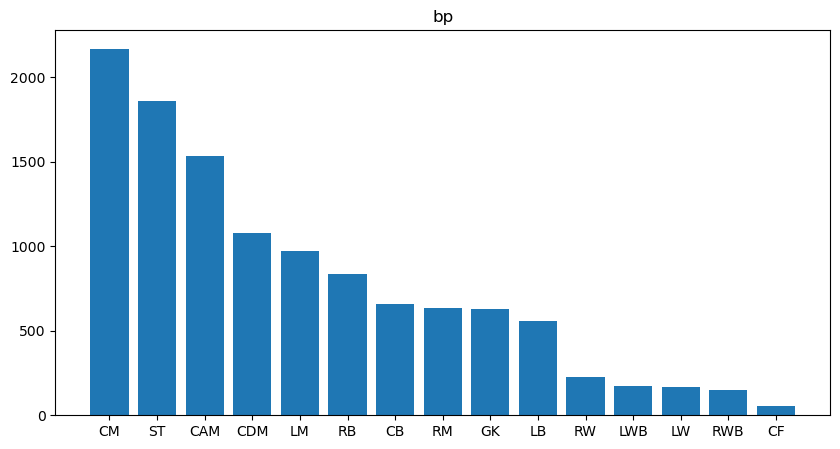

In [39]:
# Show bar plot on categorical data

for c in categoricals:
    plt.figure(figsize=(10,5))
    plt.bar(data[c].unique(), data[c].value_counts())
    plt.title(c)
    plt.show();

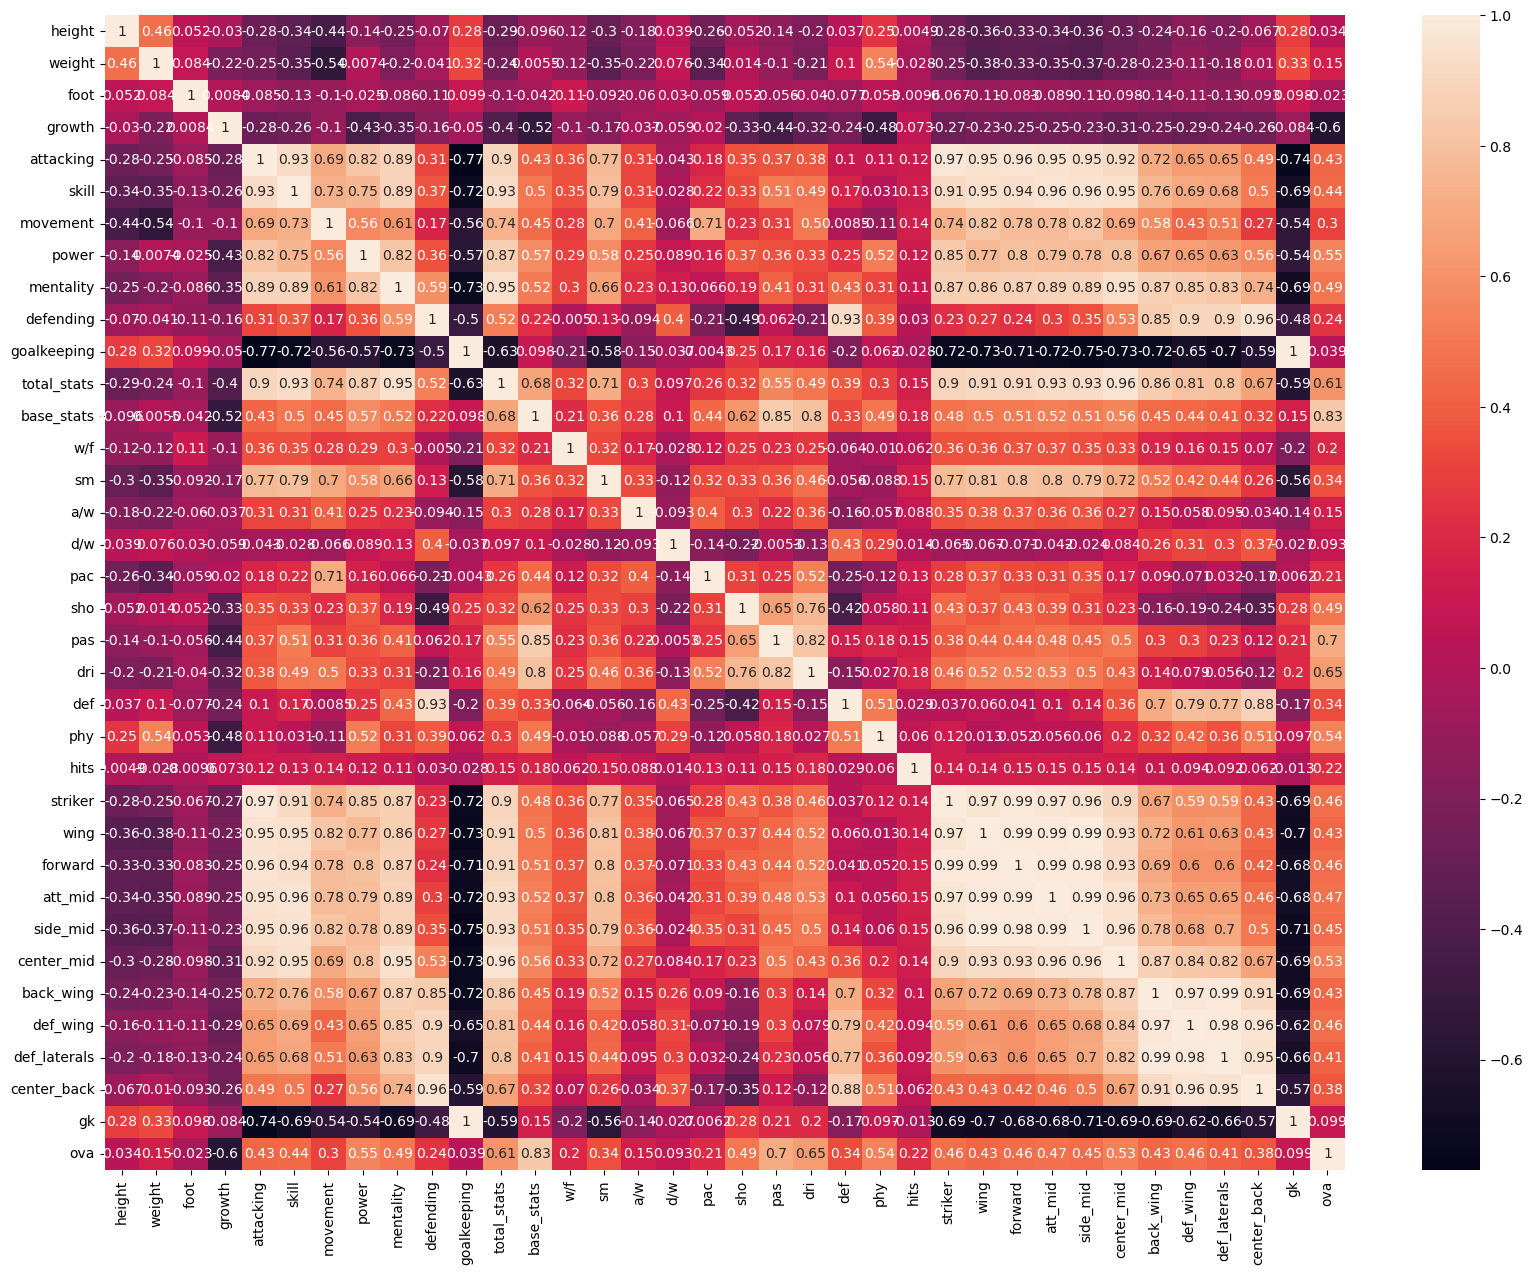

In [40]:
plt.figure(figsize = (20,15))
correlations_matrix = data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [41]:
# Separate the features from the labels

y = data['ova']
X = data.drop(['ova'], axis=1)

print(f'y: {y.shape}')
print(f'X: {X.shape}')

# Categorical features and numerical ones are going to be treated differently

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

print(f'X_num: {X_num.shape}')
print(f'X_cat: {X_cat.shape}')

# Normalizing data - numerical columns

MinMaxtransformer = MinMaxScaler().fit(X_num)
X_normalized = MinMaxtransformer.transform(X_num)
X_normalized = pd.DataFrame(X_normalized,columns=X_num.columns)

print(f'X_normalized: {X_normalized.shape}')

# Standardizing data - numerical columns

Standardtransformer = StandardScaler().fit(X_num)
X_standardized = Standardtransformer.transform(X_num)
X_standardized = pd.DataFrame(X_standardized,columns=X_num.columns)

# Encoding data - categorical columns

encoder = OneHotEncoder(drop='first').fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
feature_names = encoder.get_feature_names_out(input_features=X_cat.columns)
onehot_encoded = pd.DataFrame(encoded,columns=feature_names)

print(f'onehot_encoded: {onehot_encoded.shape}')

# Merge numerical & categorical columns

X = pd.concat([X_normalized, onehot_encoded], axis=1)

print(f'X merged: {X.shape}')

# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
y_pred_lm=lm.predict(X_test)

# Lasso L1

lasso=Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso=lasso.predict(X_test)

# Ridge L2

ridge=Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge=ridge.predict(X_test)

# ElasticNet L1+L2

elastic=ElasticNet()
elastic.fit(X_train, y_train)

y_pred_elastic=elastic.predict(X_test)

# Random forest regressor

rfr=RFR()
rfr.fit(X_train, y_train)

y_pred_rfr=rfr.predict(X_test)

# XGB regressor

xgbr=XGBR()
xgbr.fit(X_train, y_train)

y_pred_xgbr=xgbr.predict(X_test)

# LGBM regressor

lgbmr=LGBMR()
lgbmr.fit(X_train, y_train)

y_pred_lgbmr=lgbmr.predict(X_test)

# Model validation

models=[lm, lasso, ridge, elastic, rfr, xgbr, lgbmr]
model_names=['lm', 'lasso', 'ridge', 'elastic', 'rfr', 'xgbr', 'lgbmr']
preds=[y_pred_lm, y_pred_lasso, y_pred_ridge, y_pred_elastic, y_pred_rfr, y_pred_xgbr, y_pred_lgbmr]

for i in range(len(models)):
    print('=====================================')
    # R2 validation
    train_score=models[i].score(X_train, y_train)
    test_score=models[i].score(X_test, y_test)
    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))
    
    predictions = models[i].predict(X_train)
    
    # MSE validation
    train_mse=mean_squared_error(predictions, y_train)
    test_mse=mean_squared_error(preds[i], y_test)
    print ('Model: {}, train MSE: {} -- test MSE: {}'.format(model_names[i], train_mse, test_mse))

    # RMSE validation
    train_rmse=mean_squared_error(predictions, y_train)**0.5
    test_rmse=mean_squared_error(preds[i], y_test)**0.5
    print ('Model: {}, train RMSE: {} -- test RMSE: {}'.format(model_names[i], train_rmse, test_rmse))

    # MAE validation
    train_mae=mean_absolute_error(predictions, y_train)
    test_mae=mean_absolute_error(preds[i], y_test)
    print ('Model: {}, train MAE: {} -- test MAE: {}'.format(model_names[i], train_mae, test_mae))

y: (11701,)
X: (11701, 36)
X_num: (11701, 35)
X_cat: (11701, 1)
X_normalized: (11701, 35)
onehot_encoded: (11701, 14)
X merged: (11701, 49)


C:\Users\ChristianGardel\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Model: lm, train R2: 0.8799326511759399 -- test R2: 0.8776366833581448
Model: lm, train MSE: 5.669646059003769 -- test MSE: 5.793970443190077
Model: lm, train RMSE: 2.3811018581748598 -- test RMSE: 2.407066771651771
Model: lm, train MAE: 1.8283842925560585 -- test MAE: 1.818627040045756
Model: lasso, train R2: 0.0 -- test R2: -0.0039448074450259
Model: lasso, train MSE: 47.22054842163416 -- test MSE: 47.537339625697506
Model: lasso, train RMSE: 6.871720921402015 -- test RMSE: 6.894732745052378
Model: lasso, train MAE: 5.46024702772299 -- test MAE: 5.514686953489816
Model: ridge, train R2: 0.8770485036030476 -- test R2: 0.8747701461538083
Model: ridge, train MSE: 5.805837089124668 -- test MSE: 5.929702558762282
Model: ridge, train RMSE: 2.4095304706777765 -- test RMSE: 2.435098059373027
Model: ridge, train MAE: 1.857171074415673 -- test MAE: 1.8385193998497007
Model: elastic, train R2: 0.08958454148445949 -- test R2: 0.08720366338455177
Model: elastic, train MSE: 42.990317242637346 -- t

In [44]:
# Validation of R2 Scores

print('=====================================')

print(f'X_train / y_train: {lm.score(X_train, y_train)}')
print(f'X_test / y_test: {lm.score(X_test, y_test)}')

# Score on X_train prediction

print('=====================================')

predictions = lm.predict(X_train)
r2_score_x_train = r2_score(y_train, predictions)

print(f'r2_score_x_train: {r2_score_x_train}')

# Score on X_test prediction

predictions_test = lm.predict(X_test)
r2_score_x_test = r2_score(y_test, predictions_test)

print(f'r2_score_x_test: {r2_score_x_test}')

# Mean squared error

mse=mean_squared_error(y_test,predictions_test)

print(f'mse: {mse}')

# Squared of mean squared error

rmse = np.sqrt(mean_squared_error(y_test,predictions_test))

print(f'rmse: {rmse}')

X_train / y_train: 0.8799326511759399
X_test / y_test: 0.8776366833581448
r2_score_x_train: 0.8799326511759399
r2_score_x_test: 0.8776366833581448
mse: 5.793970443190077
rmse: 2.407066771651771


In [47]:
# Load new data
data_for_p = pd.read_csv('fifa21_validate.csv')
display(data_for_p.head(10))
display(data_for_p.tail())
data_for_p.shape

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,219461,E. Palmer-Brown,23,United States,FK Austria Wien,CB,CB,"FK Austria Wien Jun 30, 2021 On Loan","6'2""",194lbs,...,61+2,61+2,59+2,61+2,67+2,67+2,67+2,61+2,16+2,67
1,221896,D. Avdijaj,22,Kosovo,Heart of Midlothian,CAM,LM CAM,Heart of Midlothian 2020 ~ 2020,"5'8""",154lbs,...,47+2,47+2,49+2,45+2,38+2,38+2,38+2,45+2,17+2,68
2,247428,D. Ochoa,19,United States,Real Salt Lake,GK,GK,Real Salt Lake 2018 ~ 2020,"6'2""",176lbs,...,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,53+2,54
3,255120,N. Kenneh,16,England,Leeds United,CDM,CB CDM RB,Leeds United 2020 ~ 2022,"6'3""",170lbs,...,54+2,54+2,53+2,53+2,54+2,54+2,54+2,53+2,11+2,55
4,215556,E. Fernandes,24,Switzerland,1. FSV Mainz 05,CDM,CM CDM,1. FSV Mainz 05 2019 ~ 2023,"6'2""",170lbs,...,72+2,72+2,70+2,69+2,68+2,68+2,68+2,69+2,18+2,70
5,232407,U. Sale,23,Nigeria,Viking FK,RM,RW,Viking FK 2016 ~ 2019,"5'10""",152lbs,...,56+2,56+2,58+2,58+2,55+2,55+2,55+2,58+2,15+2,61
6,256087,K. Aguilar,17,Peru,Alianza Lima,RB,RB,Alianza Lima 2019 ~ 2023,"5'10""",163lbs,...,50+2,50+2,56+2,56+2,53+2,53+2,53+2,56+2,13+2,58
7,244719,F. Abadía,21,Argentina,Boca Juniors,GK,GK,Boca Juniors 2018 ~ 2021,"6'2""",190lbs,...,20+2,20+2,16+2,16+2,19+2,19+2,19+2,16+2,54+2,55
8,238284,J. López,20,Colombia,Rionegro Águilas,CAM,ST,Rionegro Águilas 2019 ~ 2021,"5'8""",137lbs,...,36+2,36+2,40+2,38+2,32+2,32+2,32+2,38+2,16+2,55
9,213531,L. Fernandes,24,Brazil,Philadelphia Union,CAM,CAM CM LM RM,Philadelphia Union 2013 ~ 2022,"6'1""",165lbs,...,59+1,59+1,60+1,58+1,54+1,54+1,54+1,58+1,16+1,64


,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
1994,239074,S. Aw,21,Senegal,Gil Vicente FC,LB,LB,Gil Vicente FC 2020 ~ 2023,"5'8""",143lbs,...,52+2,52+2,58+2,58+2,54+2,54+2,54+2,58+2,15+2,60
1995,241223,S. Mogi,21,Japan,Cerezo Osaka,GK,GK,Cerezo Osaka 2017 ~ 2021,"6'5""",176lbs,...,23+2,23+2,20+2,20+2,22+2,22+2,22+2,20+2,58+2,59
1996,210930,Carles Gil,27,Spain,New England Revolution,RM,RM CAM CM,New England Revolution 2019 ~ 2024,"5'7""",146lbs,...,60+2,60+2,62+2,57+2,47+2,47+2,47+2,57+2,18+2,76
1997,162993,J. Perch,34,England,Mansfield Town,CDM,CDM RB CM,Mansfield Town 2020 ~ 2021,"5'11""",176lbs,...,62+1,62+1,60+2,60+2,63+0,63+0,63+0,60+2,14+2,63
1998,254882,A. Oeynhausen,18,Germany,SC Paderborn 07,CAM,CM,SC Paderborn 07 2020 ~ 2022,"5'10""",150lbs,...,55+2,55+2,55+2,54+2,51+2,51+2,51+2,54+2,16+2,60


(1999, 101)

In [48]:
# Preprocess new data

data_for_p = preprocess(data_for_p)
data_for_p.shape

(1999, 37)

In [49]:
# Separate the features from the labels

y_for_p = data['ova']
X_for_p = data.drop(['ova'], axis=1)

print(f'y_for_p: {y_for_p.shape}')
print(f'X_for_p: {X_for_p.shape}')

# Categorical features and numerical ones are going to be treated differently

X_for_p_num = X_for_p.select_dtypes(include = np.number)
X_for_p_cat = X_for_p.select_dtypes(include = object)

print(f'X_for_p_num: {X_for_p_num.shape}')
print(f'X_for_p_cat: {X_for_p_cat.shape}')

# Normalizing data - numerical columns

X_for_p_normalized = MinMaxtransformer.transform(X_for_p_num)
X_for_p_normalized = pd.DataFrame(X_for_p_normalized,columns=X_for_p_num.columns)

# Encoding data - categorical columns

encoded_for_p = encoder.transform(X_for_p_cat).toarray()
feature_names_for_p = encoder.get_feature_names_out(input_features=X_for_p_cat.columns)
onehot_encoded_for_p = pd.DataFrame(encoded_for_p, columns=feature_names_for_p)

# Merge numerical & categorical columns

X_for_p = pd.concat([X_for_p_normalized, onehot_encoded_for_p], axis=1)

# Predict & inspect results (using linear regression)

results_for_p = lm.predict(X_for_p)
pd.concat([data_for_p,pd.Series(results_for_p, name='estimate')],axis=1).head()

y_for_p: (11701,)
X_for_p: (11701, 36)
X_for_p_num: (11701, 35)
X_for_p_cat: (11701, 1)


,bp,height,weight,foot,growth,attacking,skill,movement,power,mentality,...,att_mid,side_mid,center_mid,back_wing,def_wing,def_laterals,center_back,gk,ova,estimate
0,CB,189.0,88.0,1.0,7.0,230.0,228.0,303.0,288.0,246.0,...,50.0,52.0,53.0,61.0,63.0,63.0,69.0,18.0,67.0,63.001545
1,CAM,176.8,69.9,1.0,5.0,298.0,330.0,375.0,323.0,286.0,...,70.0,69.0,63.0,51.0,49.0,47.0,40.0,19.0,68.0,77.402455
2,GK,189.0,79.8,1.0,17.0,48.0,52.0,165.0,171.0,76.0,...,19.0,18.0,20.0,18.0,20.0,18.0,20.0,55.0,54.0,75.160336
3,CDM,192.0,77.1,1.0,23.0,215.0,224.0,275.0,242.0,230.0,...,49.0,51.0,51.0,55.0,56.0,55.0,56.0,13.0,55.0,60.328704
4,CDM,189.0,77.1,1.0,5.0,295.0,327.0,320.0,337.0,314.0,...,70.0,69.0,72.0,72.0,74.0,71.0,70.0,20.0,70.0,65.971115
